In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('black_friday_train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# EDA

In [3]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
numerical_feat=[feature for feature in df.columns if df[feature].dtypes!='O']

In [7]:
numerical_feat

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [8]:
categorical_feat=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feat

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [9]:
df.shape

(550068, 12)

In [10]:
nan_features=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [11]:
nan_features

['Product_Category_2', 'Product_Category_3']

In [12]:
for feature in nan_features:
    print("The % of NAN values in",feature,"is",np.round(df[feature].isnull().mean(),2))

The % of NAN values in Product_Category_2 is 0.32
The % of NAN values in Product_Category_3 is 0.7


In [13]:
df.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

## Let's analyse if the NAN values have any relation with the target variable(sales)

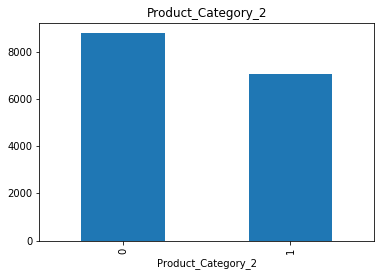

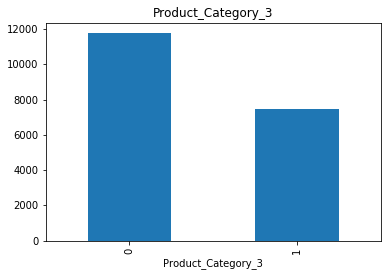

In [14]:
for feature in nan_features:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['Purchase'].median().plot.bar()
    plt.title(feature)
    plt.show()

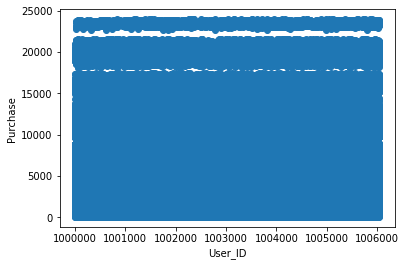

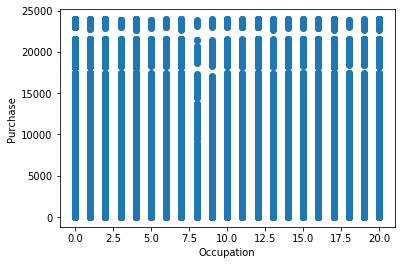

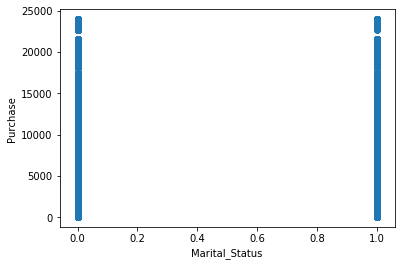

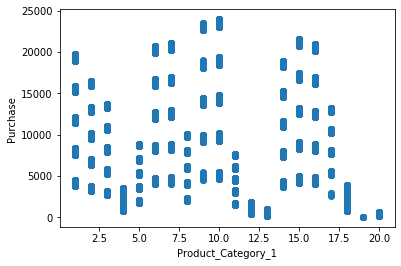

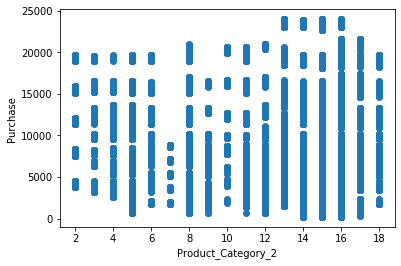

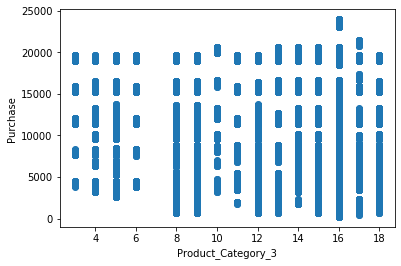

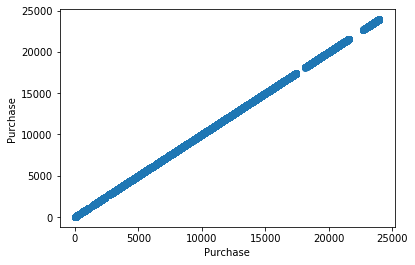

In [15]:
for feature in numerical_feat:
    data=df.copy()
    plt.scatter(df[feature],df['Purchase'])
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.show()

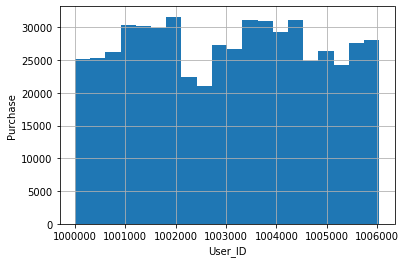

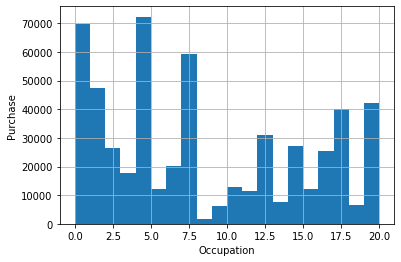

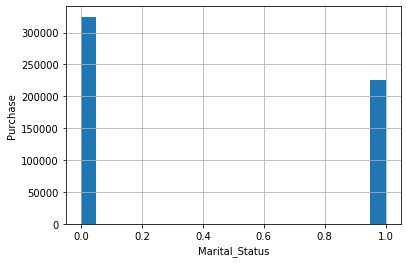

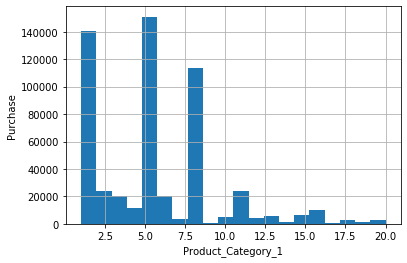

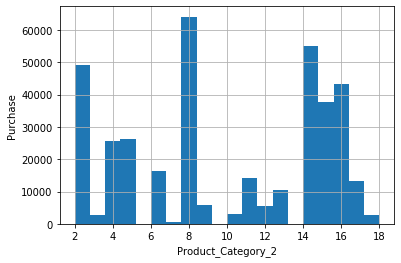

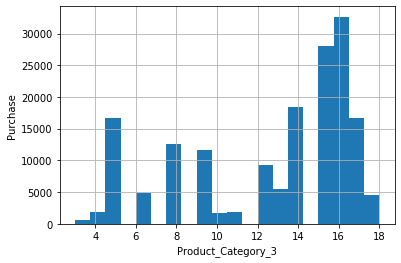

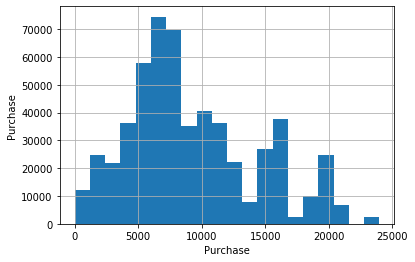

In [16]:
for feature in numerical_feat:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.show()

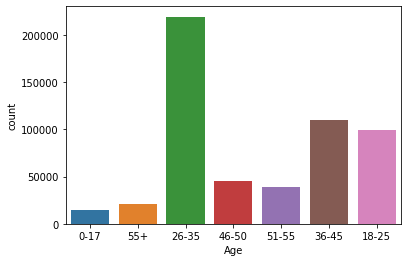

In [17]:
sns.countplot(df['Age'])

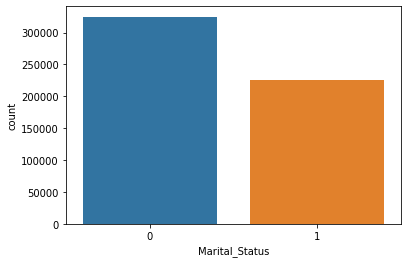

In [18]:
sns.countplot(df['Marital_Status'])

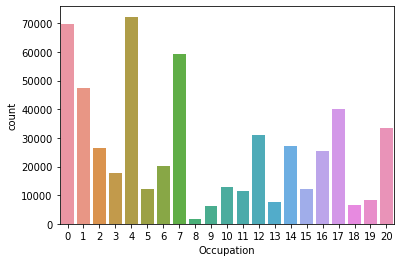

In [19]:
sns.countplot(df['Occupation'])

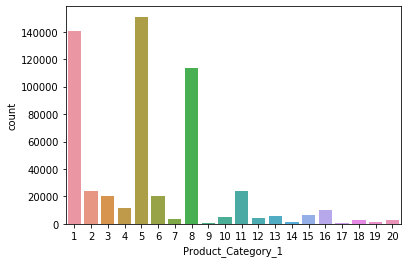

In [20]:
sns.countplot(df['Product_Category_1'])

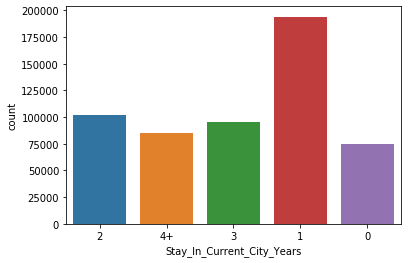

In [21]:
sns.countplot(df['Stay_In_Current_City_Years'])

# Data pre-processing

In [22]:
len(df['Product_ID'].unique())

3631

In [23]:
categorical_feat=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feat

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [24]:
len(df['City_Category'].unique())

3

In [25]:
len(df['Stay_In_Current_City_Years'].unique())

5

# Gender feature


In [26]:
df['Gender'].dtypes

dtype('O')

In [27]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [28]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [29]:
mapped={'M':1,'F':0}

In [30]:
df['Gender']=df['Gender'].apply(lambda x:mapped[x])

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


# Fill null values

In [32]:
nan_features=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [33]:
nan_features

['Product_Category_2', 'Product_Category_3']

In [34]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [35]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [36]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# City category and stay in city years One Hot encoding

In [37]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [38]:
City_Category=df[['City_Category']]
City_Category=pd.get_dummies(City_Category,drop_first=True)
City_Category.head()

,City_Category_B,City_Category_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [39]:
Stay_In_Current_City_Years=df[['Stay_In_Current_City_Years']]
Stay_In_Current_City_Years=pd.get_dummies(Stay_In_Current_City_Years,drop_first=True)
Stay_In_Current_City_Years.head()

,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
df['Age']=le.fit_transform(df['Age'])

In [43]:
df_final=pd.concat([df,Stay_In_Current_City_Years,City_Category],axis=1)

In [44]:
df_final.shape

(550068, 18)

In [45]:
df_final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,A,2,0,3,9.842329,12.668243,8370,0,1,0,0,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.000000,14.000000,15200,0,1,0,0,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,9.842329,12.668243,1422,0,1,0,0,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.000000,12.668243,1057,0,1,0,0,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,9.842329,12.668243,7969,0,0,0,1,0,1


In [47]:
df_final.drop(['Stay_In_Current_City_Years','City_Category'],axis=1,inplace=True)

In [48]:
df_final.head()

,User_ID,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,0,3,9.842329,12.668243,8370,0,1,0,0,0,0
1,1000001,P00248942,0,0,10,0,1,6.000000,14.000000,15200,0,1,0,0,0,0
2,1000001,P00087842,0,0,10,0,12,9.842329,12.668243,1422,0,1,0,0,0,0
3,1000001,P00085442,0,0,10,0,12,14.000000,12.668243,1057,0,1,0,0,0,0
4,1000002,P00285442,1,6,16,0,8,9.842329,12.668243,7969,0,0,0,1,0,1


In [49]:
df_final.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [50]:
df_final.head()

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
0,0,0,10,0,3,9.842329,12.668243,8370,0,1,0,0,0,0
1,0,0,10,0,1,6.000000,14.000000,15200,0,1,0,0,0,0
2,0,0,10,0,12,9.842329,12.668243,1422,0,1,0,0,0,0
3,0,0,10,0,12,14.000000,12.668243,1057,0,1,0,0,0,0
4,1,6,16,0,8,9.842329,12.668243,7969,0,0,0,1,0,1


In [51]:
df_final.shape

(550068, 14)

In [52]:
X=df_final.drop('Purchase',axis=1)

In [53]:
y=df_final['Purchase']

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
y_pred=reg_rf.predict(X_test)

In [61]:
reg_rf.score(X_train,y_train)

0.7919476047141364

In [62]:
reg_rf.score(X_test,y_test)

0.6270244095293824